### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score

### Read Data From CSV File

In [2]:
multiple_lr = pd.read_csv("MultipleLR.csv - MultipleLR.csv.csv")
multiple_lr.columns = ["x1","x2","x3","y"]
multiple_lr.head()

,x1,x2,x3,y
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101


divide dataset into Features(x_points) and Labels(y_points)

In [3]:
x = multiple_lr[["x1","x2","x3"]]
y = multiple_lr[["y"]]
y_points = np.ones((len(y),1),dtype="float32")
x_points = np.ones((len(x),4),dtype="float32")
y_points[:] = y
x_points[:,1:4] =x
print("x_points shape :",x_points.shape)
print("y_points shape :",y_points.shape)

x_points shape : (24, 4)
y_points shape : (24, 1)


## Functions

### Loss Function

In [4]:
def Loss (x_points,y_points,theta):
    y_hat = x_points @ theta
    cost = 1/(2* len(y_points)) * sum((y_hat -y_points)**2)
    return cost

### Vanilla/Batch Adam Gradient Decsent

In [5]:
def Batch_Adam(x_points,y_points,alpha,beta_1,beta_2,epson,iterations):
    
    # Initialization of UnReturned Values
    m = len(y_points)
    dimention = x_points.shape[1]
    momentum = np.zeros((dimention,1))
    V = np.zeros((dimention,1))
    
    # Initialization of Output (Returned Values)
    theta = np.zeros((dimention,1))
    theta_history = np.zeros((iterations,dimention))
    cost_history = np.zeros(iterations)
    hypothesis = np.zeros((iterations,m))
    loops = 0
    
    # Start Looping
    for i in range(iterations):
        # Predict Y 
        y_hat = x_points @ theta
        # add y_hat to hypothesis
        hypothesis[i,:] = y_hat.T
        # Calculate Gradient
        gradient = x_points.T @ (y_hat - y_points)
        V = V * beta_1 + (1-beta_1) * (gradient)**2
        momentum = momentum * beta_2 + (1-beta_2) * gradient
        # Bais Correction 
        V_hat = V / (1-np.power(beta_1,i+1))
        momentum_hat = momentum / (1-np.power(beta_2,i+1))
        update_gradient = alpha / (np.sqrt(V_hat+epson)) * momentum_hat
        # Update Theta
        theta = theta - update_gradient
        # add new values to Output
        loops += 1
        theta_history[i] = theta.T
        cost_history[i] = Loss(x_points,y_points,theta)
        # Stop Conditions
        if i > 1 :
            if abs(np.linalg.norm(update_gradient)) <= 0.001:
                break
            if abs(cost_history[i-1] - cost_history[i]) <= 0.001:
                break
            if abs(np.linalg.norm(theta_history[i-1]) - np.linalg.norm(theta_history[i])) <= 0.001:
                break
    return theta, theta_history, cost_history, hypothesis, loops

### Adam Batch/Vanilla Hyperparameters

In [6]:
iterations = 500
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.99
epson = 1e-9

In [7]:
theta, theta_history, cost_history, hypothesis, n_loops = Batch_Adam(x_points,y_points,alpha,beta_1,beta_2,epson,iterations)
y_predict = x_points @ theta
r2 = r2_score(y_points,y_predict)

### Adam Batch/Vanilla Results

In [8]:
print("Adam Gradient Descent Info. :- ")
print("Number of Actual Loops = {}".format(n_loops))
print("Theta_0 = {}".format(theta[0][0]))
print("Theta_1 = {}".format(theta[1][0]))
print("Theta_2 = {}".format(theta[2][0]))
print("Theta_3 = {}".format(theta[3][0]))
print("Cost/Loss = {}".format(cost_history[n_loops-1]))
print("R_Squared Of Adam = {}".format(r2))

Adam Gradient Descent Info. :- 
Number of Actual Loops = 500
Theta_0 = 0.6714574808900182
Theta_1 = 0.6716204976667253
Theta_2 = 0.6716242858615632
Theta_3 = 0.670771156044993
Cost/Loss = 6.281707899997305
R_Squared Of Adam = 0.9781029128920617


In [9]:
print("Best Prediction Of Adam = \n {}".format(y_predict))

Best Prediction Of Adam = 
 [[184.61681843]
 [181.93289583]
 [198.04332088]
 [140.9809376 ]
 [104.05447459]
 [148.36284799]
 [110.09485024]
 [172.53016341]
 [159.77103854]
 [142.99326622]
 [140.97753645]
 [187.97664612]
 [156.42571406]
 [149.03361536]
 [187.30075619]
 [149.04211635]
 [177.90062103]
 [179.24981499]
 [160.45205104]
 [173.87343092]
 [173.20264461]
 [165.81822029]
 [155.08418311]
 [191.33134367]]


### Adam Batch/Vanilla Visualization

#### Epochs VS Cost/Loss

C:\Users\AYAHAS~1\AppData\Local\Temp/ipykernel_6840/3795447472.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(n_loops),cost_history[:n_loops],'b.-',color = 'red')


Text(0.5, 1.0, 'Epochs VS Cost/Loss')

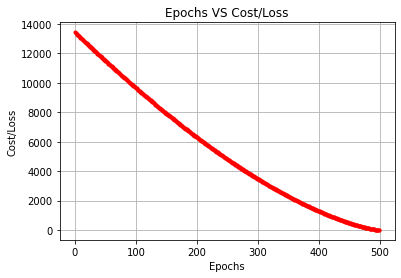

In [10]:
plt.plot(range(n_loops),cost_history[:n_loops],'b.-',color = 'red')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Cost/Loss")
plt.title("Epochs VS Cost/Loss")

#### Thetas VS Cost/Loss

Text(0.5, 1.0, 'Theta_0 VS Cost/Loss')

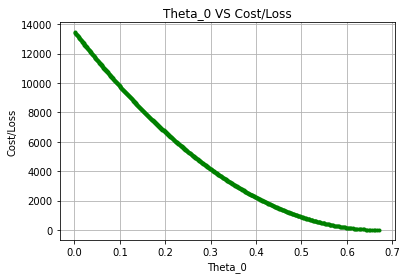

In [11]:
plt.plot(theta_history[:,0],cost_history,'.-',color = 'green')
plt.grid()
plt.xlabel("Theta_0")
plt.ylabel("Cost/Loss")
plt.title("Theta_0 VS Cost/Loss")

Text(0.5, 1.0, 'Theta_0 VS Cost/Loss')

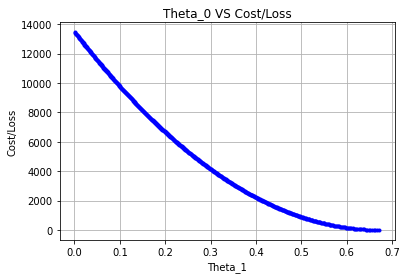

In [12]:
plt.plot(theta_history[:,1],cost_history,'.-',color = 'blue')
plt.grid()
plt.xlabel("Theta_1")
plt.ylabel("Cost/Loss")
plt.title("Theta_0 VS Cost/Loss")

Text(0.5, 1.0, 'Theta_2 VS Cost/Loss')

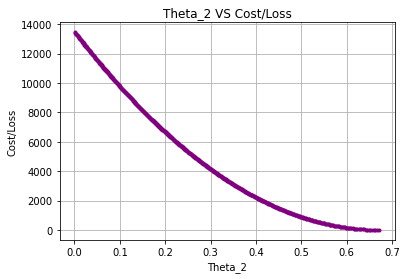

In [13]:
plt.plot(theta_history[:,2],cost_history,'.-',color = 'purple')
plt.grid()
plt.xlabel("Theta_2")
plt.ylabel("Cost/Loss")
plt.title("Theta_2 VS Cost/Loss")

Text(0.5, 1.0, 'Theta_2 VS Cost/Loss')

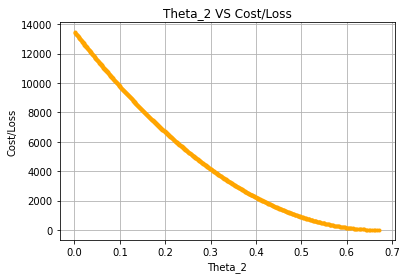

In [14]:
plt.plot(theta_history[:,2],cost_history,'.-',color = 'orange')
plt.grid()
plt.xlabel("Theta_2")
plt.ylabel("Cost/Loss")
plt.title("Theta_2 VS Cost/Loss")

### Mini-Batch Adam Gradient Decsent

In [15]:
def MiniBatch_Adam(x_points,y_points,alpha,beta_1,beta_2,epson,batch,iterations):
    
    # Initialization of UnReturned Values
    m = len(y_points)
    dimention = x_points.shape[1]
    momentum = np.zeros((dimention,1))
    V = np.zeros((dimention,1))
    
    # Initialization of Output (Returned Values)
    theta = np.zeros((dimention,1))
    theta_history = np.zeros((iterations,dimention))
    cost_history = np.zeros(iterations)
    hypothesis = np.zeros((iterations,m))
    loops = 0
    
    # Shuffle Data
    np.random.seed(55)
    all_data = np.block([y_points,x_points])
    all_data = np.random.permutation(all_data)
    y_new = all_data[:,0:1]
    x_new = all_data[:,1:]
    
    # Start Looping
    for i in range(iterations):
        
        cost = 0
        # Loop over Batch
        for j in range(0,m,batch):
            x_current = x_new[j:j+batch]
            y_current = y_new[j:j+batch]
            # Adam Style
            y_hat = x_current @ theta
            # add y_hat to hypothesis
            hypothesis[i,j:j+batch] = y_hat.T
            # Calculate Gradient
            gradient = x_current.T @ (y_hat - y_current)
            V = V * beta_1 + (1-beta_1) * (gradient)**2
            momentum = momentum * beta_2 + (1-beta_2) * gradient
            # Bais Correction 
            V_hat = V / (1-np.power(beta_1,i+1))
            momentum_hat = momentum / (1-np.power(beta_2,i+1))
            update_gradient = alpha / (np.sqrt(V_hat+epson)) * momentum_hat
            # Update Theta
            theta = theta - update_gradient
            # commulate cost
            cost += Loss(x_current,y_current,theta)
            
        # add new values to Output
        loops += 1
        theta_history[i] = theta.T
        cost_history[i] = cost
        # Stop Conditions
        if i > 1 :
            if abs(cost_history[i-1] - cost_history[i]) <= 0.0001:
                break
            if abs(np.linalg.norm(theta_history[i-1]) - np.linalg.norm(theta_history[i])) <= 0.00001:
                break
    return theta, theta_history, cost_history, hypothesis, loops

### MiniBatch Hyperparameters

In [16]:
iterations = 1000
alpha = 0.001
beta_1 = 0.8
beta_2 = 0.88
epson = 1e-9
batch = 4

In [17]:
theta, theta_history, cost_history, hypothesis, n_loops = MiniBatch_Adam(x_points,y_points,alpha,beta_1,beta_2,epson,batch,iterations)
y_predict = x_points @ theta
r2 = r2_score(y_points,y_predict)

### MiniBatch Adam Results

In [18]:
print("Adam Gradient Descent With MiniBatch Info. :- ")
print("Number of Actual Loops = {}".format(n_loops))
print("Theta_0 = {}".format(theta[0][0]))
print("Theta_1 = {}".format(theta[1][0]))
print("Theta_2 = {}".format(theta[2][0]))
print("Theta_3 = {}".format(theta[3][0]))
print("Cost/Loss = {}".format(cost_history[n_loops-1]))
print("R_Squared Of MiniBatch_Adam = {}".format(r2))

Adam Gradient Descent With MiniBatch Info. :- 
Number of Actual Loops = 1000
Theta_0 = 0.44145662130401453
Theta_1 = 0.5068382665584339
Theta_2 = 0.5451784872387178
Theta_3 = 0.9617673684469072
Cost/Loss = 21.677639426544165
R_Squared Of MiniBatch_Adam = 0.9874453425941038


In [19]:
print("Best Prediction Of MiniBatch_Adam = \n {}".format(y_predict))

Best Prediction Of MiniBatch_Adam = 
 [[184.99748755]
 [181.72036784]
 [198.7021588 ]
 [140.74614603]
 [105.27930043]
 [149.81259244]
 [112.49889254]
 [174.16454946]
 [163.27970221]
 [143.78480902]
 [142.52752222]
 [186.89020223]
 [154.30497656]
 [150.73601959]
 [188.42796815]
 [146.26340901]
 [180.00578533]
 [177.91163859]
 [159.28074322]
 [175.44660754]
 [174.33147929]
 [166.97488217]
 [152.49646248]
 [191.16742953]]


### MiniBatch Adam Visualization

#### Epochs VS Cost/Loss

C:\Users\AYAHAS~1\AppData\Local\Temp/ipykernel_6840/3795447472.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(n_loops),cost_history[:n_loops],'b.-',color = 'red')


Text(0.5, 1.0, 'Epochs VS Cost/Loss')

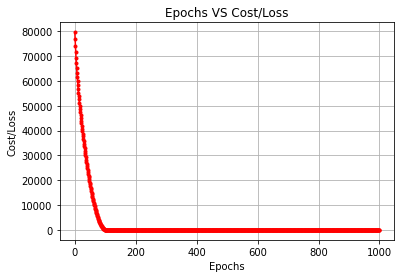

In [20]:
plt.plot(range(n_loops),cost_history[:n_loops],'b.-',color = 'red')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Cost/Loss")
plt.title("Epochs VS Cost/Loss")

#### Thetas VS Cost/Loss

Text(0.5, 1.0, 'Theta_0 VS Cost/Loss')

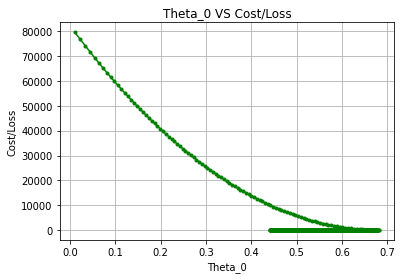

In [21]:
plt.plot(theta_history[:n_loops,0],cost_history[:n_loops],'.-',color = 'green')
plt.grid()
plt.xlabel("Theta_0")
plt.ylabel("Cost/Loss")
plt.title("Theta_0 VS Cost/Loss")

Text(0.5, 1.0, 'Theta_1 VS Cost/Loss')

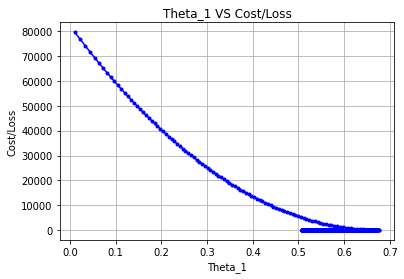

In [22]:
plt.plot(theta_history[:n_loops,1],cost_history[:n_loops],'.-',color = 'blue')
plt.grid()
plt.xlabel("Theta_1")
plt.ylabel("Cost/Loss")
plt.title("Theta_1 VS Cost/Loss")

Text(0.5, 1.0, 'Theta_2 VS Cost/Loss')

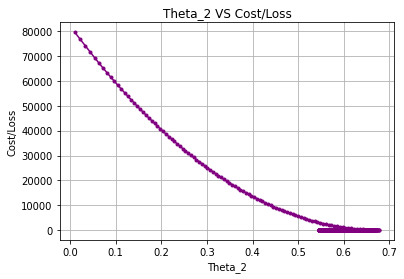

In [23]:
plt.plot(theta_history[:n_loops,2],cost_history[:n_loops],'.-',color = 'purple')
plt.grid()
plt.xlabel("Theta_2")
plt.ylabel("Cost/Loss")
plt.title("Theta_2 VS Cost/Loss")

Text(0.5, 1.0, 'Theta_3 VS Cost/Loss')

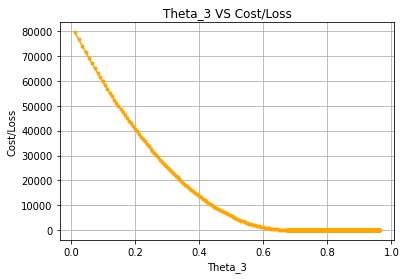

In [24]:
plt.plot(theta_history[:n_loops,3],cost_history[:n_loops],'.-',color = 'orange')
plt.grid()
plt.xlabel("Theta_3")
plt.ylabel("Cost/Loss")
plt.title("Theta_3 VS Cost/Loss")

Trying With Sklearn

In [25]:
stand_scaler = StandardScaler()
x_transform = stand_scaler.fit_transform(x_points)
lin_reg = LinearRegression().fit(x_points,y_points)
lin_reg.intercept_ , lin_reg.coef_ 

(array([-4.225357], dtype=float32),
 array([[0.        , 0.35120523, 0.5489898 , 1.1646999 ]], dtype=float32))

In [26]:
lin_reg.score(x_points,y_points)

0.9896129322625258